In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing()

In [4]:
x = pd.DataFrame(data= data.data, columns= data.feature_names)
y = pd.DataFrame(data.target)

In [5]:
x.head(n=10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [6]:
x.AveBedrms

0        1.023810
1        0.971880
2        1.073446
3        1.073059
4        1.081081
           ...   
20635    1.133333
20636    1.315789
20637    1.120092
20638    1.171920
20639    1.162264
Name: AveBedrms, Length: 20640, dtype: float64

In [7]:
x.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [8]:
x.shape

(20640, 8)

In [9]:
x.MedInc

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

In [10]:
x.index

RangeIndex(start=0, stop=20640, step=1)

In [11]:
x.set_index('MedInc', inplace=True)

In [12]:
x.head()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,,,,,,,
8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
x.reset_index(drop=False, inplace=True)

In [15]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<Axes: >

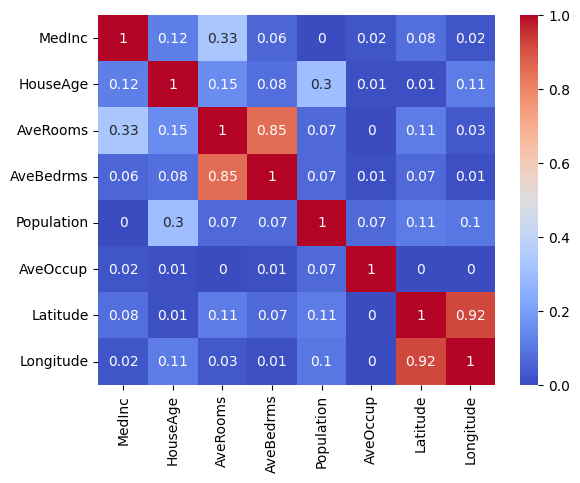

In [57]:
import seaborn as sns

correlation_matrix = x.corr().abs().round(2)
sns.heatmap(correlation_matrix, annot = True, cmap= "coolwarm")

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

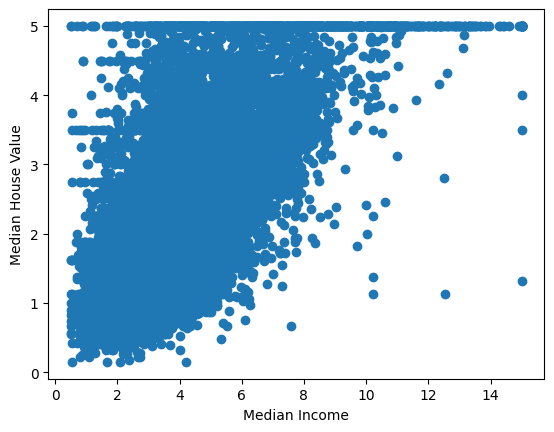

In [11]:
plt.scatter(x['MedInc'], y)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
print(f"linear regression coefficient :{lr.coef_}")

linear regression coefficient :[[ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
  -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]]


In [14]:
print(f"LinearRegression intercepts: {lr.intercept_}")

LinearRegression intercepts: [-37.02327771]


In [42]:
feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': np.abs(lr.coef_.ravel())
}).sort_values('importance', ascending=False)

<Axes: title={'center': 'Feature Importance'}, xlabel='feature'>

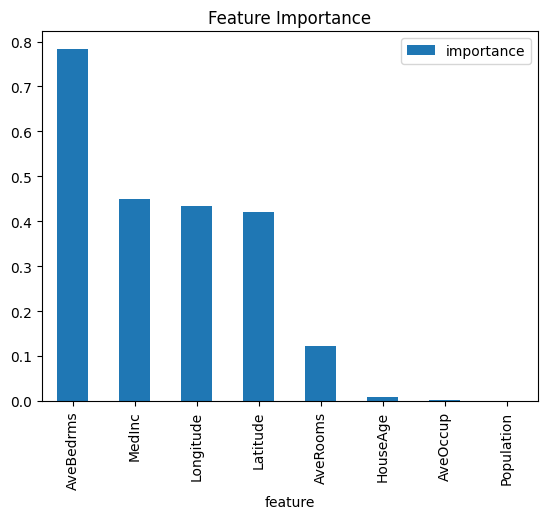

In [46]:
feature_importance.set_index('feature').plot(kind='bar' ,title='Feature Importance')

In [15]:
y_predictions = lr.predict(x_test)

In [17]:
mse = mean_squared_error(y_test, y_predictions)
r2 = r2_score(y_test, y_predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.555891598695244
Root Mean Squared Error: 0.7455813830127761
R-squared: 0.5757877060324511


In [18]:
pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]
)

In [19]:
pipe.fit(x_train, y_train)

,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [20]:
y_predictions_pipeline = pipe.predict(x_test)

print(f"Pipeline RMSE: {np.sqrt(mean_squared_error(y_test, y_predictions_pipeline))}")

Pipeline RMSE: 0.7455813830127764


In [32]:
ridge = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=1.0))
    ]
)

In [33]:
lasso = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=0.1))
    ]
)

In [34]:
ridge.fit(x_train, y_train)
lasso.fit(x_train, y_train)

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True


In [35]:
y_pred_lasso = lasso.predict(x_test)

y_pred_ridge = ridge.predict(x_test)

In [36]:
print(f"lasso mse: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"ridge mse: {mean_squared_error(y_test, y_pred_ridge)}")

lasso mse: 0.6796290284328825
ridge mse: 0.555854858943597


In [37]:
residue = y_test - y_predictions

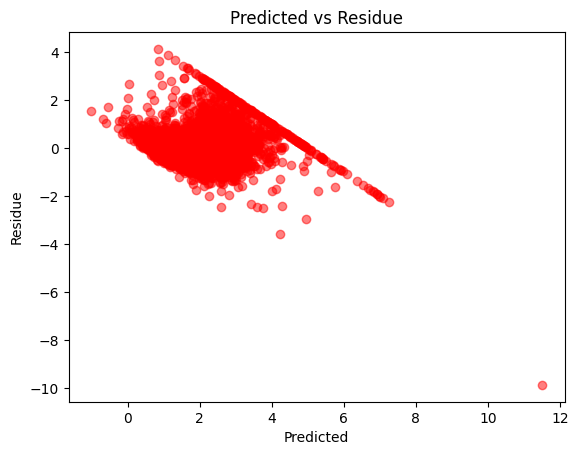

In [39]:
plt.scatter(y_predictions, residue, alpha=0.5, c='r')
plt.xlabel('Predicted')
plt.ylabel('Residue')
plt.title('Predicted vs Residue')
plt.show()